# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('ggplot')

In [14]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

In [15]:
## Create functions to replicate above formulas

# slope
slope = (np.mean(X)*np.mean(Y) - np.mean(X*Y)) / (np.mean(X) ** 2 - np.mean(X**2))

# intercept
intercept = np.mean(Y) - slope * np.mean(X)

# Y predict
Y_predict = X * slope + intercept

#R-Squared
SSR = np.sum((Y-Y_predict) ** 2)
SST = np.sum((Y-np.mean(Y)) ** 2)
r_squared = 1 - SSR/SST

In [16]:
print('Basic Regression Diagnostics')
print('----------------------------')
print(f'Slope: {round(slope, 2)}')
print(f'Y-Intercept: {round(intercept, 2)}')
print(f'R-Squared: {round(r_squared, 2)}')
print('----------------------------')
print(f'Model: Y = {round(slope, 2)} * X + {round(intercept, 2)}')

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


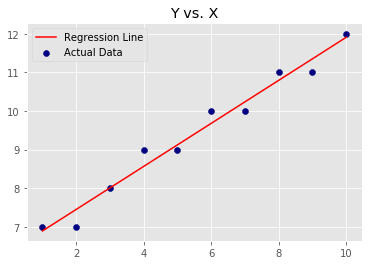

In [25]:
# plot visualizations
plt.scatter(X, Y, color='navy') # actual data
plt.plot(X, Y_predict, color='red') #regression line
plt.legend(['Regression Line', 'Actual Data'])
plt.title('Y vs. X')
plt.show()

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

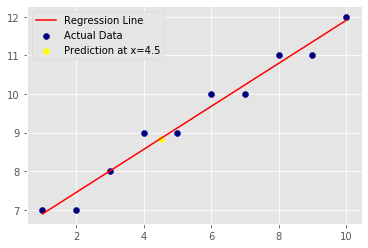

In [36]:
# Make prediction for x = 4.5 and visualize on the scatter plot
y_predict = slope * 4.5 + intercept
plt.scatter(X, Y, color='navy') # actual data
plt.plot(X, Y_predict, color='red') #regression line
plt.scatter(4.5, y_predict, color='yellow')
plt.legend(['Regression Line', 'Actual Data', 'Prediction at x=4.5'])

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [37]:
df = pd.read_csv('heightweight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
height    20 non-null int64
weight    20 non-null int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [39]:
X = df['height']
Y = df['weight']
slope = (np.mean(X)*np.mean(Y) - np.mean(X*Y)) / (np.mean(X) ** 2 - np.mean(X**2)) # slope
intercept = np.mean(Y) - slope * np.mean(X) #intercept
Y_predict = X * slope + intercept #predicted Y values

#R-Squared
SSR = np.sum((Y-Y_predict) ** 2)
SST = np.sum((Y-np.mean(Y)) ** 2)
r_squared = 1 - SSR/SST

In [40]:
print('Basic Regression Diagnostics')
print('----------------------------')
print(f'Slope: {round(slope, 2)}')
print(f'Y-Intercept: {round(intercept, 2)}')
print(f'R-Squared: {round(r_squared, 2)}')
print('----------------------------')
print(f'Model: Y = {round(slope, 2)} * X + {round(intercept, 2)}')

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48


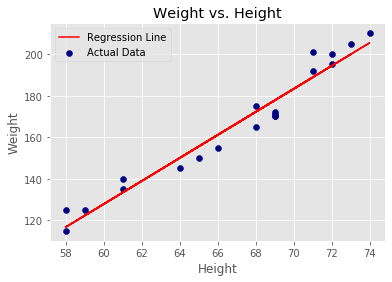

In [44]:
# plot visualizations
plt.scatter(X, Y, color='navy') # actual data
plt.plot(X, Y_predict, color='red') #regression line
plt.legend(['Regression Line', 'Actual Data'])
plt.title('Weight vs. Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()